In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

Saving ECG_filtrado__ahorasi_ultimaaaaa_otravezz20251112_153136.txt to ECG_filtrado__ahorasi_ultimaaaaa_otravezz20251112_153136.txt


**PARTE B**



> *C.*



Longitud tiempo: 481400 | Longitud señal: 481400


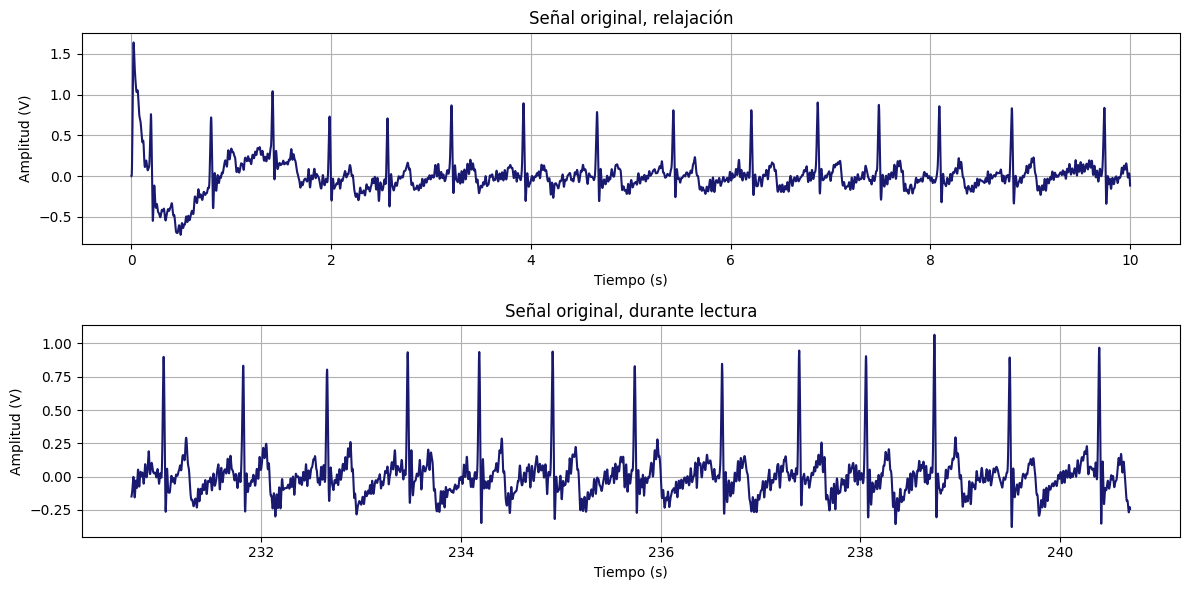

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ecg = np.loadtxt('ECG_filtrado__ahorasi_ultimaaaaa_otravezz20251112_153136.txt', comments='#')

t = ecg[:,0]
senal = ecg[:,1]

print(f"Longitud tiempo: {len(t)} | Longitud señal: {len(senal)}")

inicio = t <= 10
ti= t[inicio]
si= senal[inicio]

tf = t.max()
final = t >= (tf -10)
tf = t[final]
sf =senal[final]

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(ti, si, color='midnightblue')
plt.title("Señal original, relajación")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tf, sf, color='midnightblue')
plt.title("Señal original, durante lectura")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.grid(True)

plt.tight_layout()
plt.show()


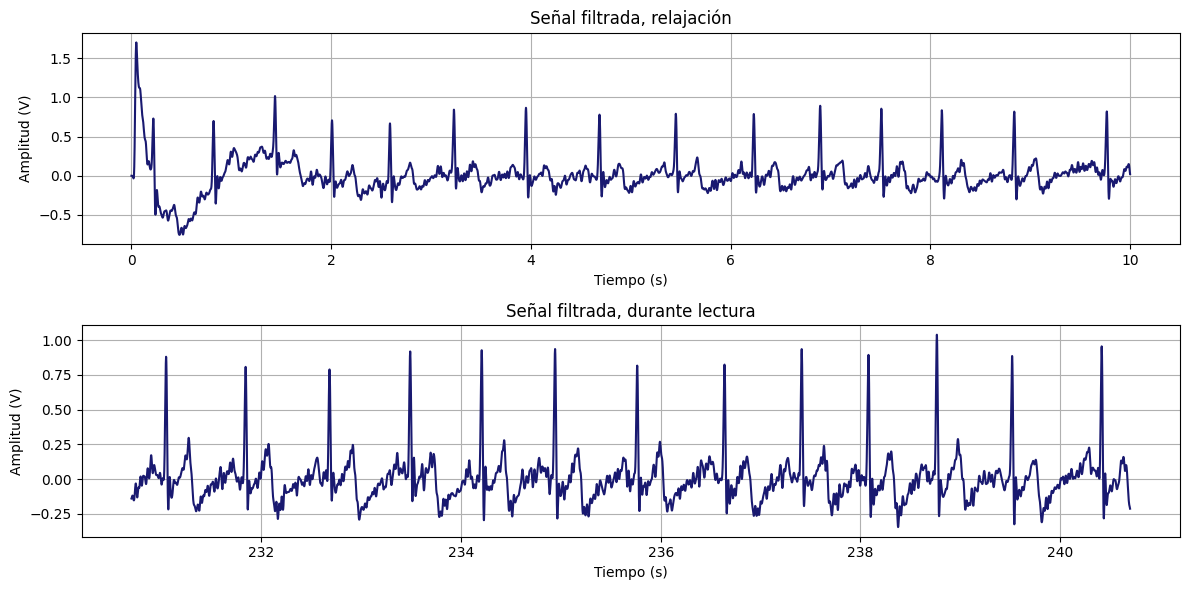

In [ ]:
# filtro FIR

from scipy.signal import firwin, lfilter

fs = 2000
nyq = fs/2

num_taps = 101 #numero de coeficientes

low_cutoff = 0.5 / nyq
high_cutoff = 40 / nyq

filtro_fir = firwin(num_taps, [low_cutoff, high_cutoff], pass_zero=False)

ecg_filtrado = lfilter(filtro_fir, 1.0, senal)

senal2 = ecg_filtrado

inicio2 = t <= 10
ti= t[inicio2]
si2= senal2[inicio2]

tf = t.max()
final2 = t >= (tf -10)
tf = t[final2]
sf2 =senal2[final2]

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(ti, si2, color='midnightblue')
plt.title("Señal filtrada, relajación")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tf, sf2, color='midnightblue')
plt.title("Señal filtrada, durante lectura")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Ecuación en diferencias de filtro FIR

h = firwin(num_taps, [low_cutoff, high_cutoff], pass_zero=False)

print("FIR: ",h)

FIR:  [-4.39605620e-05 -1.16931453e-04 -1.97685062e-04 -2.90217159e-04
 -3.98309512e-04 -5.25252981e-04 -6.73570295e-04 -8.44748869e-04
 -1.03899409e-03 -1.25501320e-03 -1.48983918e-03 -1.73870328e-03
 -1.99496316e-03 -2.25009256e-03 -2.49373621e-03 -2.71383180e-03
 -2.89679914e-03 -3.02779378e-03 -3.09102095e-03 -3.07010314e-03
 -2.94849297e-03 -2.70992114e-03 -2.33886796e-03 -1.82104561e-03
 -1.14387780e-03 -2.96962741e-04  7.27494382e-04  1.93429291e-03
  3.32490490e-03  4.89721134e-03  6.64531642e-03  8.55944762e-03
  1.06259475e-02  1.28273607e-02  1.51426165e-02  1.75473064e-02
  2.00140502e-02  2.25129467e-02  2.50120967e-02  2.74781890e-02
  2.98771355e-02  3.21747399e-02  3.43373854e-02  3.63327230e-02
  3.81303457e-02  3.97024295e-02  4.10243266e-02  4.20750958e-02
  4.28379557e-02  4.33006505e-02  4.34557173e-02  4.33006505e-02
  4.28379557e-02  4.20750958e-02  4.10243266e-02  3.97024295e-02
  3.81303457e-02  3.63327230e-02  3.43373854e-02  3.21747399e-02
  2.98771355e-02  2

In [ ]:
#Ecuación en diferencias de filtro IIR (codigo de captura)

from scipy.signal import butter

fs = 2000
lowcut = 0.5
highcut = 40
orden = 4

sos = butter(orden, [lowcut/(fs/2), highcut/(fs/2)], btype='bandpass', output='sos')

for i, sec in enumerate(sos):
    b0, b1, b2, a0, a1, a2 = sec
    print(f"Sección {i+1}:")
    print(f"y[n] = {b0:.6f}·x[n] + {b1:.6f}·x[n-1] + {b2:.6f}·x[n-2] - {a1:.6f}·y[n-1] - {a2:.6f}·y[n-2]\n")

Sección 1:
y[n] = 0.000013·x[n] + 0.000025·x[n-1] + 0.000013·x[n-2] - -1.783541·y[n-1] - 0.797115·y[n-2]

Sección 2:
y[n] = 1.000000·x[n] + 2.000000·x[n-1] + 1.000000·x[n-2] - -1.895665·y[n-1] - 0.910626·y[n-2]

Sección 3:
y[n] = 1.000000·x[n] + -2.000000·x[n-1] + 1.000000·x[n-2] - -1.997047·y[n-1] - 0.997050·y[n-2]

Sección 4:
y[n] = 1.000000·x[n] + -2.000000·x[n-1] + 1.000000·x[n-2] - -1.998817·y[n-1] - 0.998820·y[n-2]



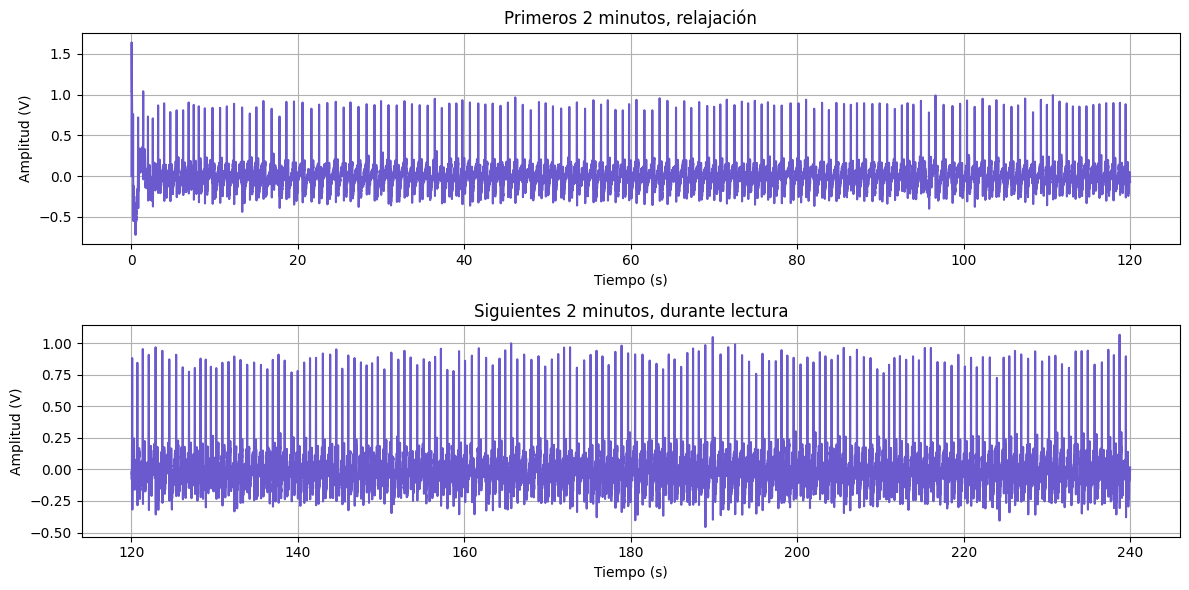

In [ ]:
#guerdar en dos diferentes secciones

duracion_segmento = 120 #segundos -> 2 minutos

muestras_por_segmento = fs * duracion_segmento

t1 = t[:muestras_por_segmento]
s1 = senal[:muestras_por_segmento]

t2 = t[muestras_por_segmento:2*muestras_por_segmento]
s2 = senal[muestras_por_segmento:2*muestras_por_segmento]

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(t1, s1, color='slateblue')
plt.title("Primeros 2 minutos, relajación")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t2, s2, color='slateblue')
plt.title("Siguientes 2 minutos, durante lectura")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.grid(True)

plt.tight_layout()
plt.show()


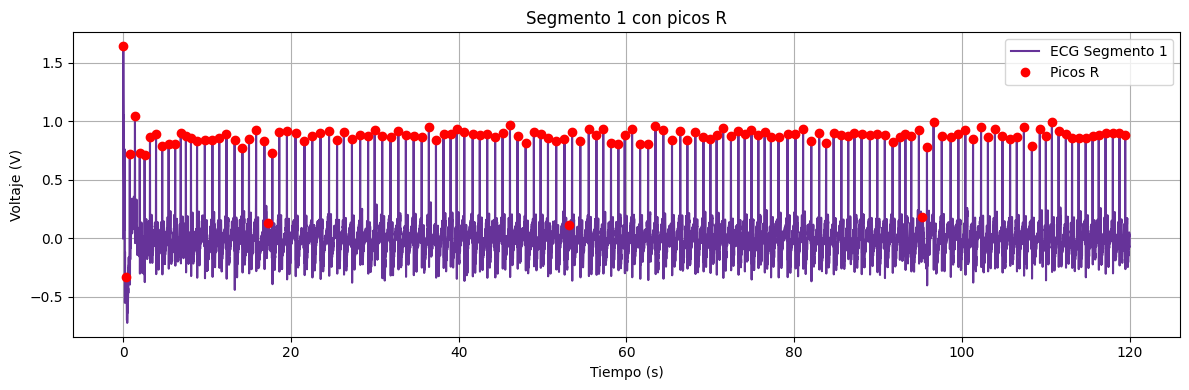

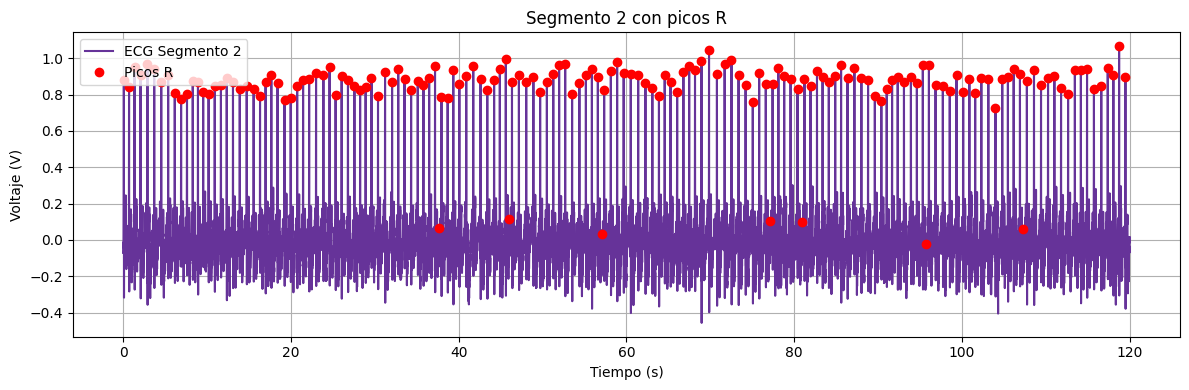

In [ ]:
#detectar R-R

picos1, _ = find_peaks(s1, prominence=0.2, distance=int(0.3 * fs))
picos2, _ = find_peaks(s2, prominence=0.2, distance=int(0.3 * fs))

tiempos_R1 = t1[picos1]
tiempos_R2 = t2[picos2]
RR1 = np.diff(tiempos_R1)
RR2 = np.diff(tiempos_R2)

mean_RR1 = np.mean(RR1)
std_RR1 = np.std(RR1)
rmssd1 = np.sqrt(np.mean(np.square(np.diff(RR1))))

mean_RR2 = np.mean(RR2)
std_RR2 = np.std(RR2)
rmssd2 = np.sqrt(np.mean(np.square(np.diff(RR2))))

plt.figure(figsize=(12,4))
plt.plot(t1, s1, label='ECG Segmento 1', color='rebeccapurple')
plt.plot(t1[picos1], s1[picos1], 'ro', label='Picos R')
plt.title("Segmento 1 con picos R")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(t2, s2, label='ECG Segmento 2', color='rebeccapurple')
plt.plot(t2[picos2], s2[picos2], 'ro', label='Picos R')
plt.title("Segmento 2 con picos R")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



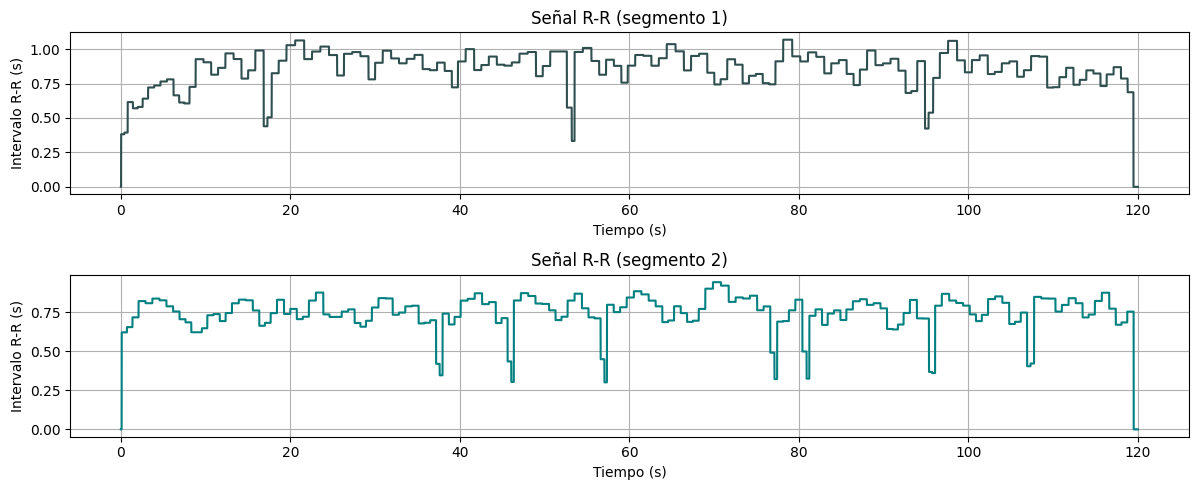

In [ ]:
def construir_senal_rr(tiempos_R, RR, duracion_total, fs):
    tiempo = np.linspace(0, duracion_total, int(fs * duracion_total))
    senal_rr = np.zeros_like(tiempo)

    for i in range(len(RR)):
        inicio = int(tiempos_R[i] * fs)
        fin = int(tiempos_R[i+1] * fs)
        senal_rr[inicio:fin] = RR[i]

    return tiempo, senal_rr

tiempo_rr1, senal_rr1 = construir_senal_rr(tiempos_R1, RR1, duracion_segmento, fs)
tiempo_rr2, senal_rr2 = construir_senal_rr(tiempos_R2, RR2, duracion_segmento, fs)

plt.figure(figsize=(12,5))

plt.subplot(2,1,1)
plt.plot(tiempo_rr1, senal_rr1, color='darkslategrey')
plt.title("Señal R-R (segmento 1)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Intervalo R-R (s)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tiempo_rr2, senal_rr2, color='teal')
plt.title("Señal R-R (segmento 2)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Intervalo R-R (s)")
plt.grid(True)

plt.tight_layout()
plt.show()



> *D.*



In [ ]:
print("Segmento 1:")
print(f"Media R-R: {mean_RR1:.3f} s")
print(f"Desviación estándar R-R: {std_RR1:.3f} s")
print(f"RMSSD: {rmssd1:.3f} s")

print("\nSegmento 2:")
print(f"Media R-R: {mean_RR2:.3f} s")
print(f"Desviación estándar R-R: {std_RR2:.3f} s")
print(f"RMSSD: {rmssd2:.3f} s")


Segmento 1:
Media R-R: 0.841 s
Desviación estándar R-R: 0.141 s
RMSSD: 0.135 s

Segmento 2:
Media R-R: 0.733 s
Desviación estándar R-R: 0.125 s
RMSSD: 0.127 s


In [ ]:
from scipy.signal import welch
import numpy as np
from scipy.integrate import trapezoid

f1, psd1 = welch(rr_uniforme1, fs=fs_interp, nperseg=256)
f2, psd2 = welch(rr_uniforme2, fs=fs_interp, nperseg=256)

lf_band = (f1 >= 0.04) & (f1 < 0.15)
hf_band = (f1 >= 0.15) & (f1 < 0.4)

lf1 = trapezoid(psd1[lf_band], f1[lf_band])
hf1 = trapezoid(psd1[hf_band], f1[hf_band])
lf2 = trapezoid(psd2[lf_band2], f2[lf_band2])
hf2 = trapezoid(psd2[hf_band2], f2[hf_band2])

lfhf1 = lf1 / hf1 if hf1 != 0 else np.nan

lf_band2 = (f2 >= 0.04) & (f2 < 0.15)
hf_band2 = (f2 >= 0.15) & (f2 < 0.4)

lfhf2 = lf2 / hf2 if hf2 != 0 else np.nan

print("Segmento 1:")
print(f"LF: {lf1:.3f}, HF: {hf1:.3f}, LF/HF: {lfhf1:.3f}, predominio parasimpático")

print("\nSegmento 2:")
print(f"LF: {lf2:.3f}, HF: {hf2:.3f}, LF/HF: {lfhf2:.3f}, predominio simpático")


Segmento 1:
LF: 0.002, HF: 0.006, LF/HF: 0.340, predominio parasimpático

Segmento 2:
LF: 0.004, HF: 0.004, LF/HF: 1.138, predominio simpático


**PARTE C**



> *E.*



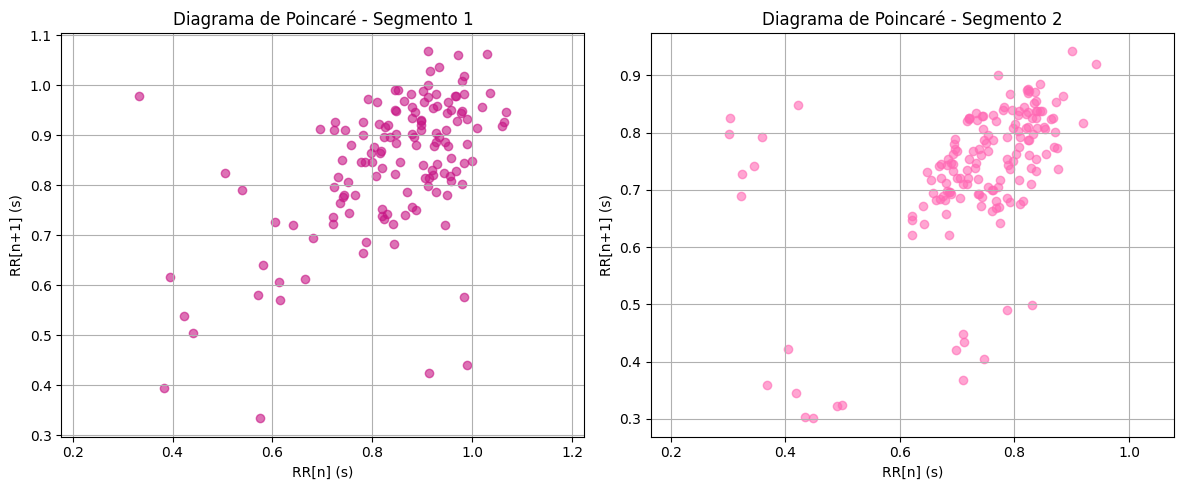

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

RR1_x = RR1[:-1]
RR1_y = RR1[1:]

RR2_x = RR2[:-1]
RR2_y = RR2[1:]

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(RR1_x, RR1_y, alpha=0.6, color='mediumvioletred')
plt.title("Diagrama de Poincaré - Segmento 1")
plt.xlabel("RR[n] (s)")
plt.ylabel("RR[n+1] (s)")
plt.axis('equal')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(RR2_x, RR2_y, alpha=0.6, color='hotpink')
plt.title("Diagrama de Poincaré - Segmento 2")
plt.xlabel("RR[n] (s)")
plt.ylabel("RR[n+1] (s)")
plt.axis('equal')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def calcular_sd1_sd2(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]
    diff = rr_n1 - rr_n
    suma = rr_n1 + rr_n

    sd1 = np.std(diff / np.sqrt(2))
    sd2 = np.std(suma / np.sqrt(2))
    cvi = np.log10(sd2 / sd1) if sd1 != 0 else np.nan
    csi = sd2 / sd1 if sd1 != 0 else np.nan

    return sd1, sd2, cvi, csi

sd1_1, sd2_1, cvi1, csi1 = calcular_sd1_sd2(RR1)
sd1_2, sd2_2, cvi2, csi2 = calcular_sd1_sd2(RR2)

print("Segmento 1:")
print(f"SD1: {sd1_1:.4f} s (actividad vagal)")
print(f"SD2: {sd2_1:.4f} s (actividad simpática)")
print(f"CVI: {cvi1:.4f}")
print(f"CSI: {csi1:.4f}")

print("\nSegmento 2:")
print(f"SD1: {sd1_2:.4f} s (actividad vagal)")
print(f"SD2: {sd2_2:.4f} s (actividad simpática)")
print(f"CVI: {cvi2:.4f}")
print(f"CSI: {csi2:.4f}")

Segmento 1:
SD1: 0.0952 s (actividad vagal)
SD2: 0.1718 s (actividad simpática)
CVI: 0.2563
CSI: 1.8044

Segmento 2:
SD1: 0.0898 s (actividad vagal)
SD2: 0.1532 s (actividad simpática)
CVI: 0.2318
CSI: 1.7054
